In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import pandas as pd
from matplotlib import rcParams,font_manager
from matplotlib.colors import ListedColormap

from fourinarowfunctions import *

datadir = "../data/"

In [2]:
#name of your data file
filename = datadir + 'trialdata.csv'
data_dict = load_data(filename, False)
parsed_dict = {}
for username, data in data_dict.items():
    try:
        parsed_dict[username] = get_parsed_data(data)
    except AssertionError as e:
        continue
usernames = parsed_dict.keys()
print(f"{len(usernames)} users with complete data")

158 users with complete data


In [3]:
rcParams['font.family'] = "sans-serif" 
rcParams['font.weight'] = "roman" 
rcParams['font.style'] = "normal" # not 100% sure what this does but it was recommended
rcParams['font.size'] = 32 # not 100% sure what this does but it was recommended
rcParams['pdf.fonttype'] = 42
rcParams['axes.linewidth'] = 2 #thickness of the border
rcParams['xtick.major.width'] = rcParams['axes.linewidth'] # make sure line widths are consistent
rcParams['ytick.major.width'] = rcParams['axes.linewidth']
rcParams['axes.spines.right'] = False #hides right border
rcParams['axes.spines.top'] = False #hides top
rcParams['legend.frameon'] = False #hides box around the legend
rcParams['legend.fontsize'] = 18 #font size in pt
rcParams['axes.labelsize'] = 32 
rcParams['xtick.labelsize'] = 24
rcParams['ytick.labelsize'] = rcParams['xtick.labelsize']
rcParams['lines.linewidth'] = 3
rcParams['xtick.major.size'] = 5
rcParams['lines.markersize'] = 16
rcParams['ytick.major.size'] = rcParams['xtick.major.size']

username2studyid = {username: username.split(":")[0] for username in usernames}
username2psiturkid = {username: username.split(":")[1] for username in usernames}

Users that have the same StudyID

Should be empty

In [4]:
duplicates = pd.DataFrame(username2studyid.items(), columns=["username", "StudyID"])
duplicates[duplicates["StudyID"].duplicated(keep=False)]

,username,StudyID
92,866:R_1gV06gSb8WYiLyG,866
110,866:R_31YEgt5MqfcfZMC,866


In [5]:
age = pd.read_csv(datadir + "SubjectAge.csv")
pwm = pd.read_csv(datadir + "params_with_metrics.csv")
dur = pd.read_csv(datadir + "gameDurations.csv")
rts = pd.read_csv(datadir + "reactiontimes.csv")

bins = [7, 12, 18, 24]
ageBinrNr2Value = {0: 10, 1: 15, 2:21}
age['ageBin'] = pd.cut(age['FlooredAge'], bins)
age['ageBinNr'] = age['ageBin'].cat.codes
age['ageBinValue'] = age.apply(lambda row: ageBinrNr2Value.get(row['ageBinNr'], 0), axis = 1)
dur["MainDurationMinutes"] = pd.to_numeric(dur["MainDurationSeconds"]) / 60
dur["TotalDurationMinutes"] = pd.to_numeric(dur["TotalDurationSeconds"], errors='coerce') / 60
dur["StudyID"] = dur["User"].apply(lambda x: username2studyid[x])
rts["TotalMoves"] = rts["UserMoves"] + rts["OpponentMoves"]
rts["StudyID"] = rts["User"].apply(lambda x: username2studyid[x])
raw_metrics = pwm.loc[:,("subject", "fold", "planning depth", "feature drop rate", "heuristic quality", "elo")]
raw_metrics["StudyID"] = raw_metrics["subject"].apply(lambda x: username2studyid[x])
raw_metrics = pd.merge(raw_metrics, age, on="StudyID", how="left")
metrics = raw_metrics.dropna()
dropped_nans = raw_metrics[~raw_metrics.index.isin(metrics.index)]
print(f"Dropped rows with nans: {len(dropped_nans)}")
dropped_nans

Dropped rows with nans: 40


,subject,fold,planning depth,feature drop rate,heuristic quality,elo,StudyID,DoB,Gender,ExactAge,FlooredAge,TaskDate,ageBin,ageBinNr,ageBinValue
550,A1052:R_787p5urRmH36oyR,1,2.758460,0.222370,0.595397,222,A1052,12-7-1995,M,25.6466,25.0,26-2-2021,NaN,-1.0,0.0
551,A1052:R_787p5urRmH36oyR,2,5.818790,0.304880,0.511857,222,A1052,12-7-1995,M,25.6466,25.0,26-2-2021,NaN,-1.0,0.0
552,A1052:R_787p5urRmH36oyR,3,1.890280,0.315870,0.549100,222,A1052,12-7-1995,M,25.6466,25.0,26-2-2021,NaN,-1.0,0.0
553,A1052:R_787p5urRmH36oyR,4,3.577450,0.261370,0.596973,222,A1052,12-7-1995,M,25.6466,25.0,26-2-2021,NaN,-1.0,0.0
554,A1052:R_787p5urRmH36oyR,5,0.000565,0.227950,0.614226,222,A1052,12-7-1995,M,25.6466,25.0,26-2-2021,NaN,-1.0,0.0
615,A1153:R_1CwnNA5xXOlHq5l,1,0.007242,0.470660,0.388199,-116,A1153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
616,A1153:R_1CwnNA5xXOlHq5l,2,2.894970,0.480380,0.354045,-116,A1153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617,A1153:R_1CwnNA5xXOlHq5l,3,3.124830,0.312740,0.339734,-116,A1153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
618,A1153:R_1CwnNA5xXOlHq5l,4,7.923260,0.566220,0.230695,-116,A1153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619,A1153:R_1CwnNA5xXOlHq5l,5,2.879000,0.415660,0.249818,-116,A1153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
age_colors = ['#7DE3AC', '#129951','#20382B']
age_labels = ["8 to 12","13 to 17","18 to 24"]

rcParams['figure.figsize'] = (8,6) #figure size in inches

def set_labels(ax, title, reposition_ticks = True):
    ax.set_xlabel("Age")
    ax.set_ylabel(title)
    labels = age_labels.copy()
    if reposition_ticks:
        ax.set_xticks(list(ageBinrNr2Value.values()))
    ax.set_xticklabels(labels)
    ax.legend([])
    return ax

def plot_with_errorbars(col, title, df = None):
    if not isinstance(df, pd.DataFrame):
        df = metrics.groupby("subject").mean().reset_index()
    ax = df.groupby("ageBinValue")[col].aggregate(['mean', 'sem']).plot(yerr="sem", color='k')
    size = 20
    df.plot.scatter('ExactAge', col, size, [age_colors[int(binNr)] for binNr in df['ageBinNr']], ax=ax)
    size = 300
    df.groupby("ageBinValue")[col].aggregate(['mean']).reset_index().plot.scatter('ageBinValue', 'mean', size, age_colors, ax=ax)
    print(f"{len(df.dropna(subset=[col]))} rows used in this graph")
    set_labels(ax, title)

150 rows used in this graph


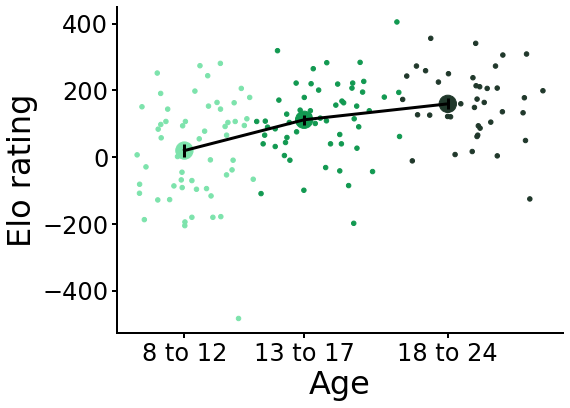

In [7]:
plot_with_errorbars("elo", "Elo rating")

150 rows used in this graph


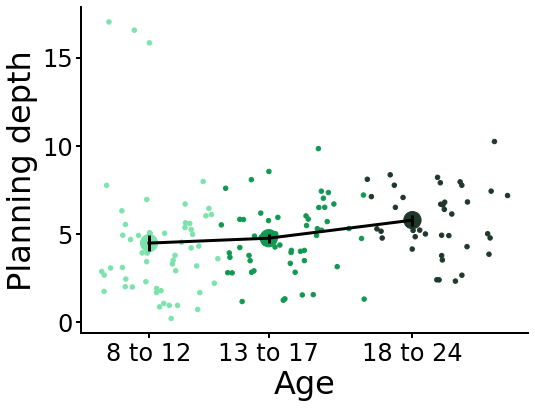

In [8]:
plot_with_errorbars("planning depth", "Planning depth")

150 rows used in this graph


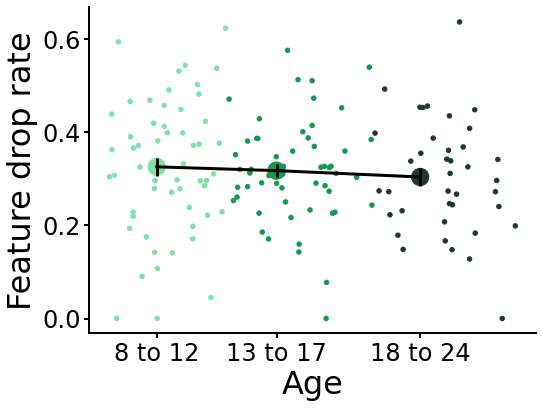

In [9]:
plot_with_errorbars("feature drop rate", "Feature drop rate")

150 rows used in this graph


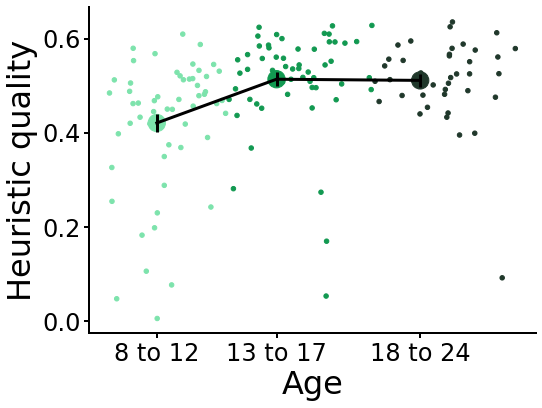

In [10]:
plot_with_errorbars("heuristic quality", "Heuristic quality")

In [11]:
durage = pd.merge(dur, age, how="left", on="StudyID")
print(f"Subjects in data: {len(durage)}")
# only include subjects listed in the first cell
durage = durage[durage["User"].isin(usernames)]
print(f"Subjects after selection: {len(durage)}")
# Remove duplicate subjects. Duplicates creep in if on or both of params_with_metrics or the age csv's contains duplicates
durage = durage.drop_duplicates(subset=["User"], keep="first")
print(f"Subjects after filtering duplicates: {len(durage)}")
# Drop subjects for which no age was available. Check that you have the expected number of subjects left!
durage = durage.dropna(subset=["ageBin"])
print(f"Subjects with age bin: {len(durage)}")

Subjects in data: 158
Subjects after selection: 158
Subjects after filtering duplicates: 158
Subjects with age bin: 150


In [12]:
rcParams['figure.figsize'] = (6,6) #figure size in inches

def plot_freq(col, title):
    plotdata = durage.groupby("ageBin")[col].aggregate(['mean', 'sem'])
    ax = plotdata.plot(kind="bar", yerr="sem", color=[age_colors])
    set_labels(ax, title, False).tick_params("x", labelrotation=0)

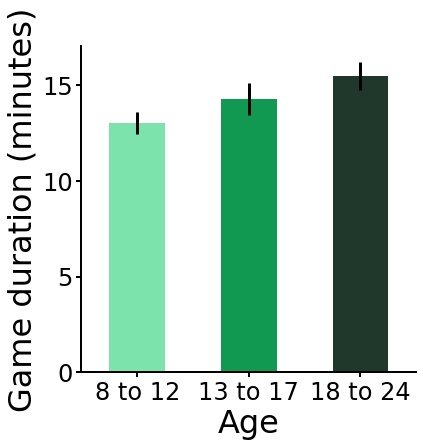

In [13]:
plot_freq("MainDurationMinutes", "Game duration (minutes)")

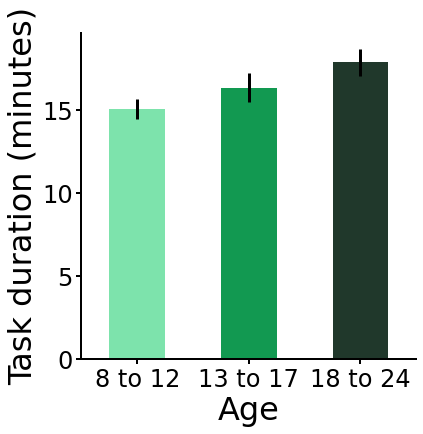

In [14]:
plot_freq("TotalDurationMinutes", "Task duration (minutes)")

In [15]:
plotdata = pd.merge(rts, age, on="StudyID", how="left")[["User", "GameNr", "TotalMoves", "ageBinNr"]].drop_duplicates()
plotdata = plotdata[plotdata["ageBinNr"] >= 0]
plotdata["count"] = 1
plotdata = plotdata.groupby(["ageBinNr", "TotalMoves"])["count"].sum().reset_index().pivot(index="TotalMoves",columns="ageBinNr").fillna(0)
plotdata.loc[37] = 0 # Add an empty value at the end (36 moves is a full board)
plotdata = plotdata.sort_index()

subsPerBin = metrics[["subject", "ageBinNr"]].drop_duplicates().groupby("ageBinNr").count()
for binNr in range(len(bins) - 1):
    plotdata.iloc[:,binNr] = plotdata.iloc[:,binNr] / subsPerBin.iloc[binNr,0]

plotdata

count                    
ageBinNr         0.0       1.0       2.0
TotalMoves                              
6           0.000000  0.000000  0.025641
7           7.727273  7.107143  6.051282
8           4.490909  4.160714  3.589744
9           2.527273  2.625000  2.692308
10          2.109091  2.428571  2.051282
11          2.818182  2.767857  3.564103
12          1.745455  2.178571  2.461538
13          1.909091  2.375000  2.333333
14          1.981818  1.732143  2.025641
15          1.709091  1.589286  1.461538
16          1.127273  1.285714  0.974359
17          1.109091  1.267857  1.307692
18          0.800000  0.714286  1.153846
19          0.690909  0.785714  0.615385
20          0.545455  0.571429  0.717949
21          0.436364  0.482143  0.641026
22          0.309091  0.410714  0.487179
23          0.381818  0.267857  0.384615
24          0.290909  0.214286  0.230769
25          0.327273  0.303571  0.307692
26          0.145455  0.214286  0.102564
27          0.254545  0.125000  0.179487
28          0.109091  0.089286  0.230769
29          0.145455  0.142857  0.128205
30          0.127273  0.017857  0.025641
31          0.036364  0.017857  0.000000
32          0.054545  0.035714  0.153846
33          0.054545  0.035714  0.025641
34          0.109091  0.000000  0.025641
35          0.018182  0.000000  0.025641
36          0.909091  1.000000  1.000000
37          0.000000  0.000000  0.000000

Text(0, 0.5, 'Average frequency')

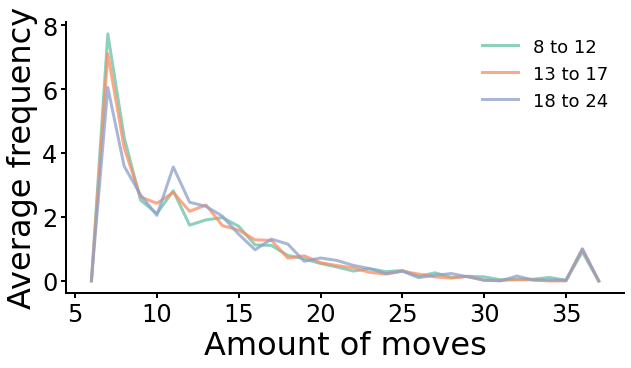

In [16]:
ax = plotdata.plot(color=["#66C2A5C0", "#FC8D62C0", "#8DA0CBC0"], figsize=(10, 5))
ax.legend(age_labels)
ax.set_xlabel("Amount of moves")
ax.set_ylabel("Average frequency")